## 1.Kütüphaneler


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,auc

from tensorflow.keras.utils import to_categorical
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")


## 2. Veri setini yükle

In [2]:
cifar10=tf.keras.datasets.cifar10

(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [3]:
## X_train boyut,
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
## 50000 tane eğitim, 10000 tane test görüntümüz var
# Veriler 32*32 boyutunda ve 3 boyutlu yani renkli

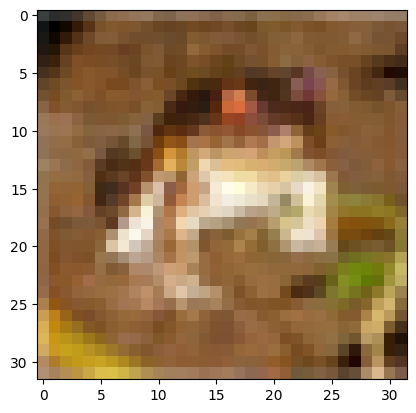

In [7]:
## Verileri görselleştirelim(rastgele)

plt.figure()
plt.imshow(X_train[0])
#plt.colorbar()
plt.grid(False)
plt.show()

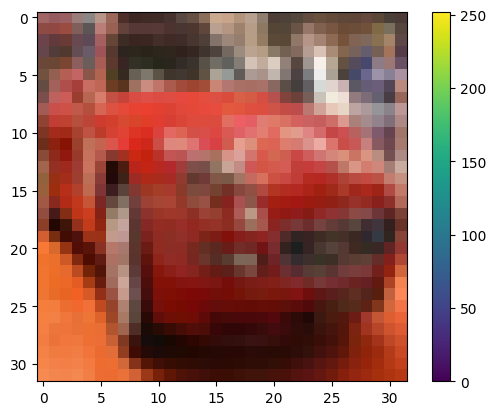

In [8]:
## Verileri görselleştirelim(rastgele)

plt.figure()
plt.imshow(X_train[5])
plt.colorbar()
plt.grid(False)
plt.show()

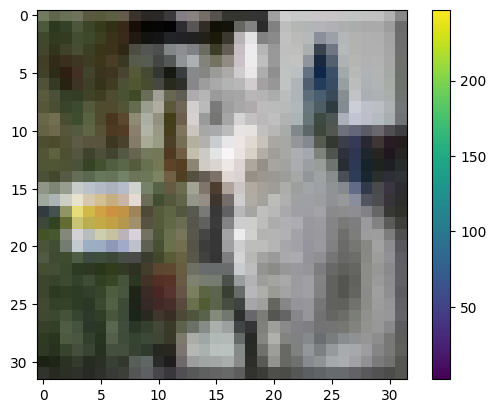

In [9]:
## Verileri görselleştirelim(rastgele)

plt.figure()
plt.imshow(X_train[78])
plt.colorbar()
plt.grid(False)
plt.show()

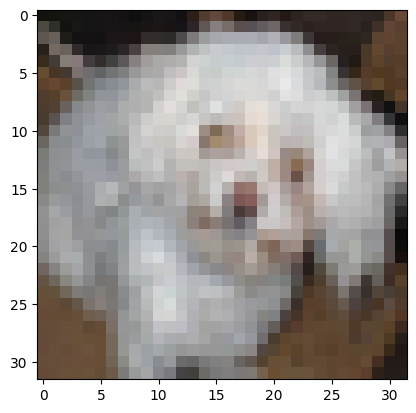

In [10]:
## Verileri görselleştirelim(rastgele)

plt.figure()
plt.imshow(X_test[1000])
#plt.colorbar()
plt.grid(False)
plt.show()

## 3. Verileri normalleştirelim



In [11]:
X_train.shape,X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [12]:

X_train = X_train / 255.0

X_test = X_test / 255.0

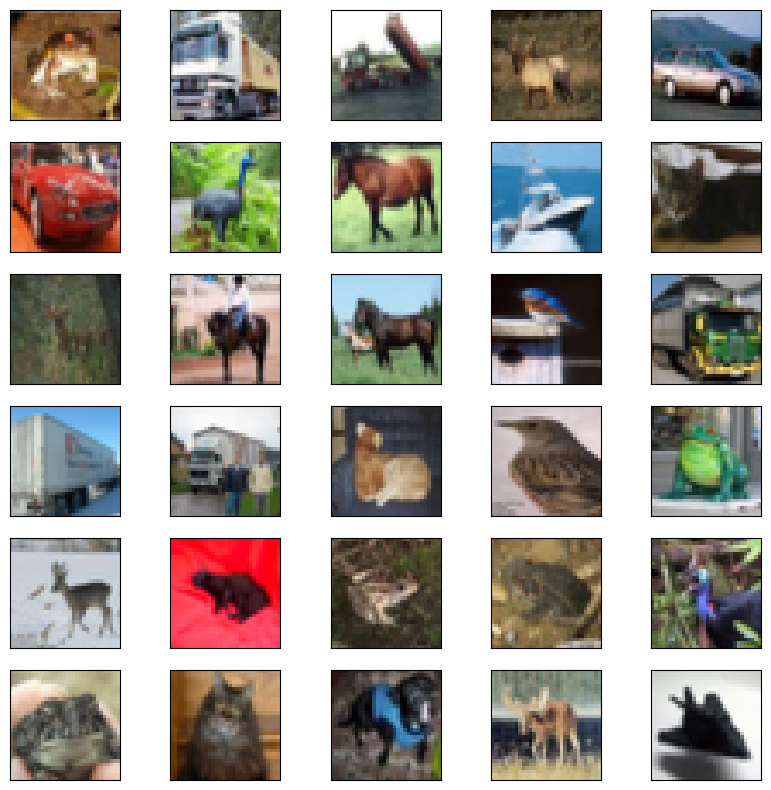

In [13]:
## 30 görüntüyü görselleştirelim

plt.figure(figsize=(10,10))

for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

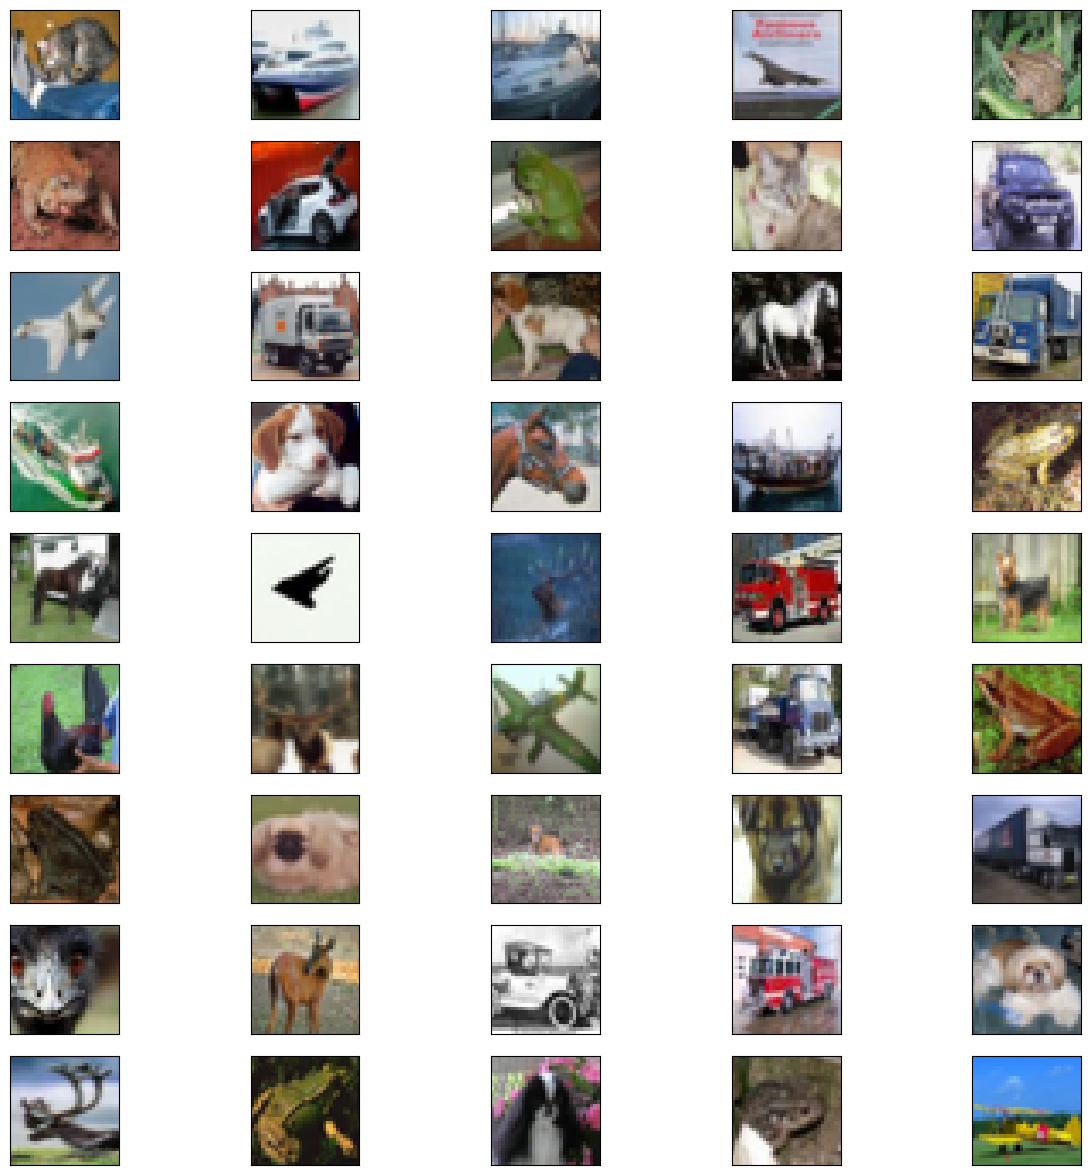

In [14]:
## 30 görüntüyü görselleştirelim

plt.figure(figsize=(15,15))
for i in range(45):
    plt.subplot(9,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
plt.show()

### 4. Makine Öğrenmesi Modeli Oluşturma

In [15]:
X_train.shape[0]

50000

In [16]:
# Verileri 28x28 görüntü formatından 784 özellikli vektörlere düzleştirelim
# X_train ve X_test'i vektöre dönüştürme
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Vektör boyutlarını kontrol etme
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (50000, 3072)
X_test shape: (10000, 3072)


In [17]:
## X_train.shape[0] veri setindeki örnek sayısı,
# Makine Öğrenmesi modelleri verileri tek boyutlu vektörler olarak alır. 32*32 boyutundaki görüntü 3072 özellikli vektöre dönüştürülür. (32*32=3072)
# Burdaki -1 kalan boyutu otomotik olarak hesaplar, istersek şu şekilde yapabilirdik; (ikisi aynı sonucu verir)

#X_train = X_train.reshape(X_train.shape[0], 32 * 32)
#X_test = X_test.reshape(X_test.shape[0], 32 * 32)


In [18]:
#?KNeighborsClassifier

In [19]:
## KNN modeli

knn=KNeighborsClassifier().fit(X_train,y_train)

In [20]:
y_pred=knn.predict(X_test)


acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [21]:
acc

0.3398

In [22]:
f1

0.3260170986061005

In [23]:
recall

0.3398

In [24]:
precision

0.4304261825528496

In [25]:
# Karmaşıklık matrisi

cm = confusion_matrix(y_test, y_pred)
cm


array([[537,   4, 117,  13,  59,   7,  26,   5, 225,   7],
       [139, 205, 110,  42, 155,  36,  61,  10, 217,  25],
       [107,   3, 452,  52, 226,  34,  66,   8,  49,   3],
       [ 70,   8, 234, 217, 193, 115,  95,  17,  46,   5],
       [ 64,   1, 262,  35, 514,  21,  41,   7,  53,   2],
       [ 71,   3, 227, 155, 187, 220,  66,  14,  51,   6],
       [ 27,   2, 273,  68, 314,  37, 248,   2,  28,   1],
       [ 93,  10, 181,  50, 280,  52,  53, 210,  67,   4],
       [141,  14,  52,  38,  54,  16,  14,   8, 655,   8],
       [153,  67,  98,  68, 124,  23,  46,  29, 252, 140]])

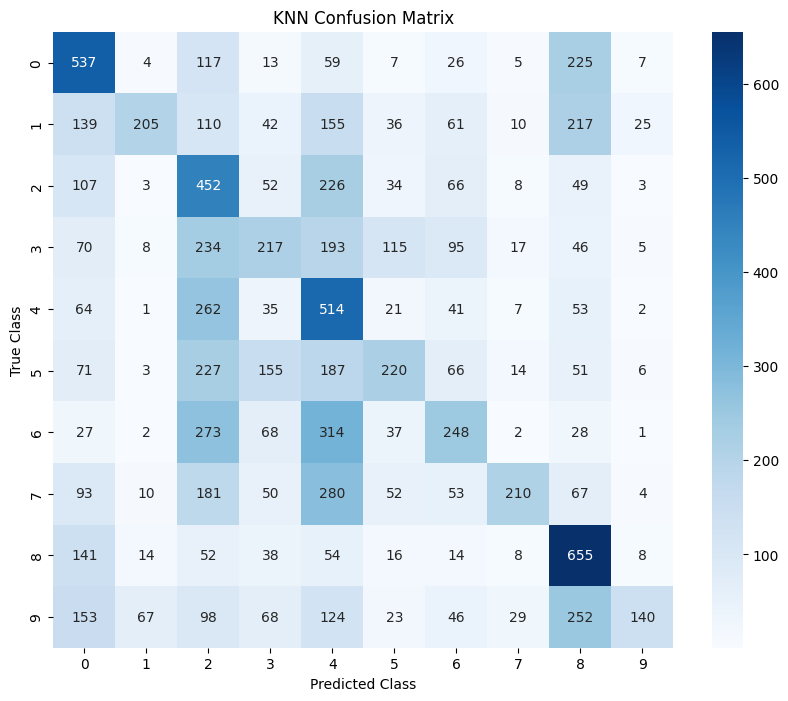

In [26]:
# görselleştirelim
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

In [27]:
## Random Forest oluştur

In [28]:
rf=RandomForestClassifier().fit(X_train,y_train)

In [29]:
y_pred=rf.predict(X_test)


acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [30]:
print(f'Doğruluk (Accuracy): {acc:.4f}')
print(f'F1 Skoru: {f1:.4f}')
print(f'Geri Çağırma (Recall): {recall:.4f}')
print(f'Kesinlik (Precision): {precision:.4f}')


Doğruluk (Accuracy): 0.4679
F1 Skoru: 0.4640
Geri Çağırma (Recall): 0.4679
Kesinlik (Precision): 0.4633


In [31]:
# Karmaşıklık matrisi

cm = confusion_matrix(y_test, y_pred)
cm


array([[568,  39,  53,  17,  34,  25,  26,  18, 159,  61],
       [ 33, 560,  17,  34,  15,  37,  37,  32,  56, 179],
       [100,  46, 331,  74, 145,  59, 122,  72,  21,  30],
       [ 49,  51,  59, 270,  74, 194, 145,  66,  23,  69],
       [ 56,  20, 147,  63, 394,  46, 150,  82,  27,  15],
       [ 36,  22,  84, 160,  81, 394,  87,  77,  30,  29],
       [ 12,  37,  92,  73, 101,  51, 563,  29,   7,  35],
       [ 42,  45,  52,  68,  93,  82,  49, 442,  26, 101],
       [ 83,  86,  18,  31,  20,  31,  11,  23, 614,  83],
       [ 43, 168,  14,  31,  21,  27,  36,  38,  79, 543]])

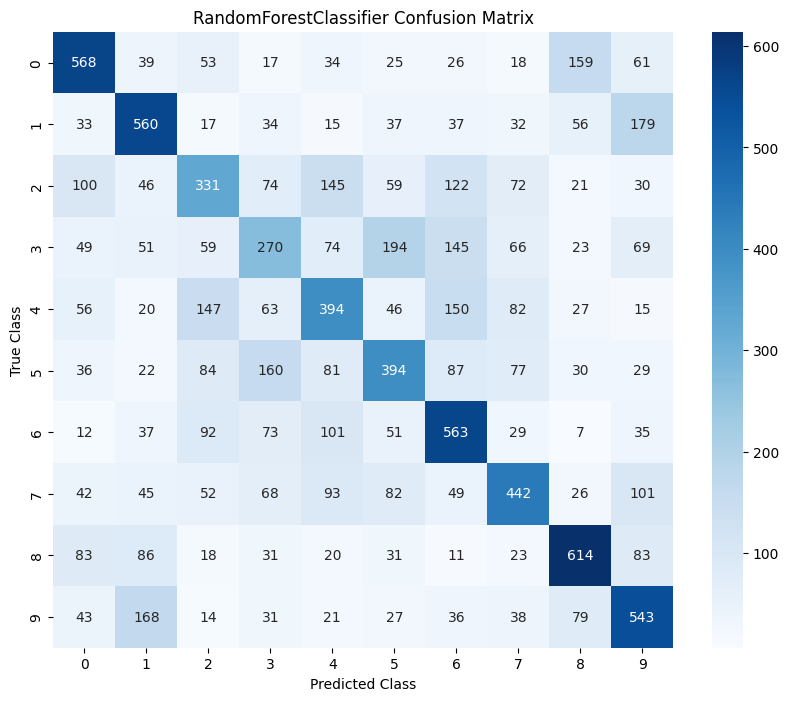

In [32]:
# görselleştirelim
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('RandomForestClassifier Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

In [35]:
#?DecisionTreeClassifier

In [33]:
dt=DecisionTreeClassifier().fit(X_train,y_train)

In [34]:
y_pred=dt.predict(X_test)


acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [35]:
print(f'Doğruluk (Accuracy): {acc:.4f}')
print(f'F1 Skoru: {f1:.4f}')
print(f'Geri Çağırma (Recall): {recall:.4f}')
print(f'Kesinlik (Precision): {precision:.4f}')


Doğruluk (Accuracy): 0.2667
F1 Skoru: 0.2667
Geri Çağırma (Recall): 0.2667
Kesinlik (Precision): 0.2669


In [40]:
#modeller cifar 10 görüntü sınıflandırmasında başarısız oldu CNN ile tahmin yapacağız

## 5. YSA ile Model Eğitimi

###gerekli kütüphaneleri yüklüyoruz

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from tensorflow.keras.regularizers import l2


In [2]:
# Veri yükleme
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 10s 0us/step


In [3]:
# Veri ön işleme
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
y_train.shape

(50000, 1)

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
model = Sequential()
# Convolutional Layers
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dense(32, activation='relu'))
# Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))


# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.F1Score()])

In [7]:
#kategorilerin encode edilmesi gerekiyor
from keras.utils import to_categorical


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [8]:
hist=model.fit(X_train, y_train, epochs=50, batch_size=150, validation_data=(X_test, y_test))

Epoch 1/50
334/334 [==============================] - 86s 252ms/step - loss: 1.8771 - accuracy: 0.2959 - precision: 0.5686 - recall: 0.0667 - f1_score: 0.2893 - val_loss: 1.4596 - val_accuracy: 0.4670 - val_precision: 0.7347 - val_recall: 0.2047 - val_f1_score: 0.4420
Epoch 2/50
334/334 [==============================] - 85s 254ms/step - loss: 1.5104 - accuracy: 0.4518 - precision: 0.6631 - recall: 0.2137 - f1_score: 0.4448 - val_loss: 1.2818 - val_accuracy: 0.5269 - val_precision: 0.7630 - val_recall: 0.2987 - val_f1_score: 0.5155
Epoch 3/50
334/334 [==============================] - 85s 253ms/step - loss: 1.3395 - accuracy: 0.5249 - precision: 0.7249 - recall: 0.3120 - f1_score: 0.5197 - val_loss: 1.1263 - val_accuracy: 0.5942 - val_precision: 0.7641 - val_recall: 0.4233 - val_f1_score: 0.5851
Epoch 4/50
334/334 [==============================] - 83s 250ms/step - loss: 1.2339 - accuracy: 0.5664 - precision: 0.7512 - recall: 0.3712 - f1_score: 0.5628 - val_loss: 1.0792 - val_accuracy:

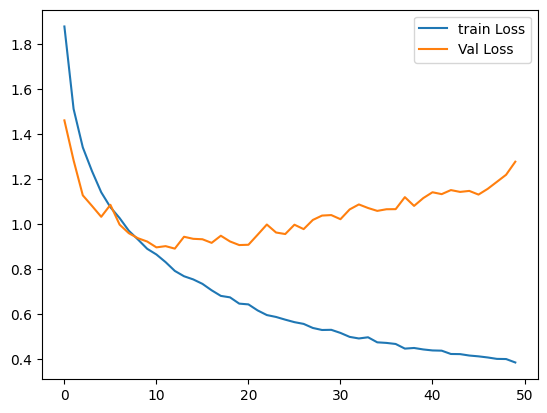

In [11]:
plt.figure()
plt.plot(hist.history["loss"], label="train Loss")
plt.plot(hist.history["val_loss"], label="Val Loss")
plt.legend()
plt.show()

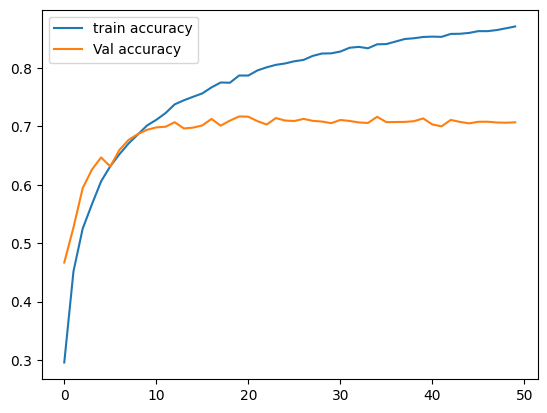

In [12]:
plt.figure()
plt.plot(hist.history["accuracy"], label="train accuracy")
plt.plot(hist.history["val_accuracy"], label="Val accuracy")
plt.legend()
plt.show()

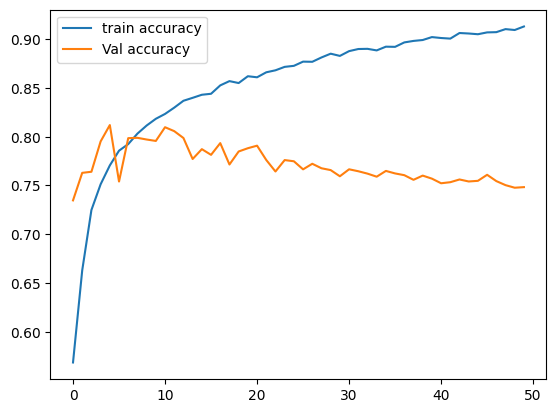

In [18]:
plt.figure()
plt.plot(hist.history["precision"], label="train accuracy")
plt.plot(hist.history["val_precision"], label="Val accuracy")
plt.legend()
plt.show()

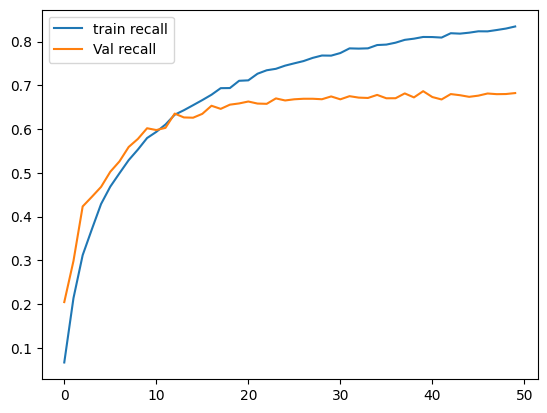

In [19]:
plt.plot(hist.history["recall"], label="train recall")
plt.plot(hist.history["val_recall"], label="Val recall")
plt.legend()
plt.show()

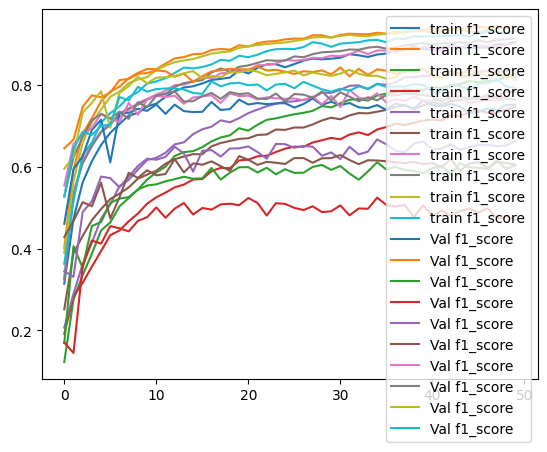

In [20]:
plt.plot(hist.history["f1_score"], label="train f1_score")
plt.plot(hist.history["val_f1_score"], label="Val f1_score")
plt.legend()
plt.show()

In [14]:

# Nümerik vektörlerden kategorik verilere dönüş
y_train_categorical = np.argmax(y_train, axis=1)
y_test_categorical = np.argmax(y_test, axis=1)

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

313/313 [==============================] - 10s 30ms/step


<Figure size 3000x3000 with 0 Axes>

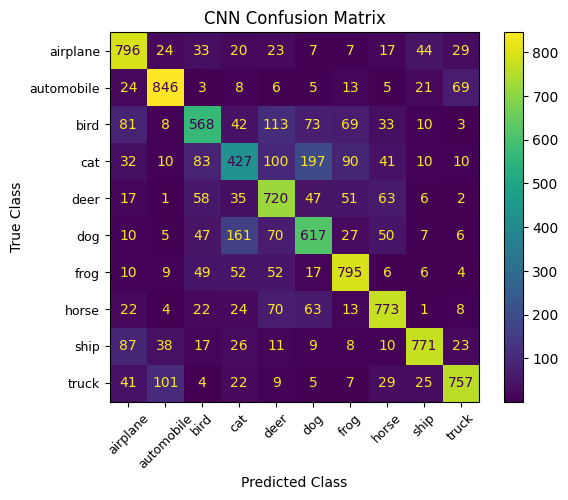

In [17]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Tahmin edilen sınıfları ve gerçek sınıfları al
y_pred = model.predict(X_test)
y_true = y_test_categorical

# Karmaşıklık matrisi hesapla
cm = confusion_matrix(y_true, y_pred.argmax(axis=1))

plt.figure(figsize=(30, 30))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks(fontsize=9,rotation=45)
plt.yticks(fontsize=9)
plt.show()